<a href="https://colab.research.google.com/github/inbalh1/ML/blob/main/Copy_of_HW1_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HW1 - Data Exploration and Preparation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as model_selection

In [ ]:
from matplotlib import pylab
params = {'xtick.labelsize': 18,
 'ytick.labelsize': 18,
 'axes.titlesize' : 22,
 'axes.labelsize' : 20,
 'legend.fontsize': 18,
 'legend.title_fontsize': 22,
 'figure.titlesize': 24
 }
pylab.rcParams.update(params)
pd.set_option('display.max_columns', None)

# Part 1: Data Loading and First Look


## Loading the dataset

In [ ]:
!rm *.csv

from google.colab import files
print("Please load the raw csv data")
uploadedData = files.upload()
filename = list(uploadedData)[0]

rm: cannot remove '*.csv': No such file or directory
Please load the raw csv data


Saving virus_data.csv to virus_data.csv


In [ ]:
dataset = pd.read_csv(filename)

In [ ]:
# (Q1)
dataset.shape

(2500, 28)

In [ ]:
# (Q2)
dataset.num_of_siblings.value_counts()

1.0    786
2.0    553
0.0    544
3.0    318
4.0    120
5.0     34
6.0      9
7.0      1
8.0      1
9.0      1
Name: num_of_siblings, dtype: int64

In [ ]:
# (Q3)
print(dataset.info())
print(dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             2500 non-null   int64  
 1   age                    2381 non-null   float64
 2   sex                    2364 non-null   object 
 3   weight                 2367 non-null   float64
 4   blood_type             2359 non-null   object 
 5   address                2372 non-null   object 
 6   current_location       2382 non-null   object 
 7   num_of_siblings        2367 non-null   float64
 8   happiness_score        2389 non-null   float64
 9   household_income       2374 non-null   float64
 10  conversations_per_day  2392 non-null   float64
 11  sugar_levels           2376 non-null   float64
 12  sport_activity         2367 non-null   float64
 13  symptoms               1490 non-null   object 
 14  pcr_date               2382 non-null   object 
 15  PCR_

In [ ]:
# (Q4)
dataset.sport_activity.value_counts()

1.0    907
0.0    662
2.0    486
3.0    195
4.0    117
Name: sport_activity, dtype: int64

In [ ]:
dataset.symptoms.value_counts()

low_appetite                                          418
sore_throat                                           416
low_appetite;sore_throat                              188
fever                                                 105
sore_throat;fever                                      77
low_appetite;fever                                     48
cough;shortness_of_breath                              45
shortness_of_breath                                    37
low_appetite;shortness_of_breath                       24
shortness_of_breath;sore_throat                        24
cough;low_appetite;shortness_of_breath                 19
low_appetite;sore_throat;fever                         19
cough;shortness_of_breath;sore_throat                  17
low_appetite;shortness_of_breath;sore_throat           10
shortness_of_breath;fever                               7
cough;low_appetite;shortness_of_breath;sore_throat      7
cough;shortness_of_breath;fever                         6
cough;shortnes

In [ ]:
dataset.address.value_counts()

38412 Park Road Apt. 628\nYoungland, WA 74405           1
10446 Ramirez Square\nPort Melanieside, ND 33099        1
832 Patricia Circles Suite 670\nWest Jared, NJ 31439    1
PSC 6491, Box 6540\nAPO AP 96294                        1
4048 Kyle Loaf\nWest Dakotatown, VT 66882               1
                                                       ..
99882 Becker Coves\nLake Angel, NH 76416                1
044 Jimmy Key Suite 866\nSanchezstad, OR 03209          1
9566 King Hills\nStevenshire, IA 08162                  1
PSC 7715, Box 1444\nAPO AP 25945                        1
594 Bowen Lane Apt. 576\nHudsonstad, IA 70844           1
Name: address, Length: 2372, dtype: int64

##Partitioning the data 


In [ ]:
# (Q5)
train, test = model_selection.train_test_split(dataset, test_size=0.2, random_state=29)

In [ ]:
# (Q6)
# Turn risk values to nembers (in  order  to use them)
train['risk_numerical'] = train.risk.map({'High':1, 'Low':-1, np.nan:np.nan})

Correlation is: 0.026


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.04, 'Correlation of risk (numerical) and PCR_04')

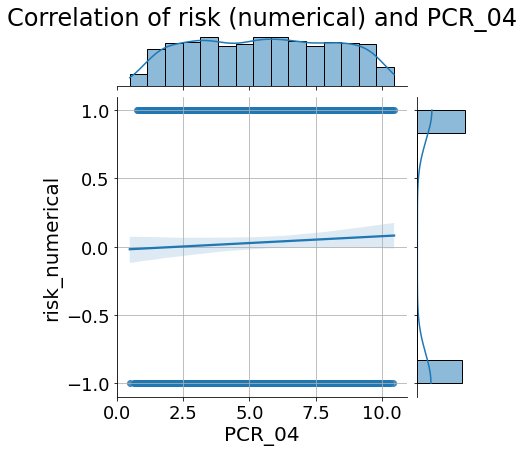

In [ ]:
feature = 'PCR_04'
#plt.grid(alpha=0.5)
x = train[feature]
y = train.risk_numerical
# Compute correlation
print("Correlation is: {:.3f}".format(train.corr().risk_numerical[feature]))
g = sns.jointplot(train[feature], train.risk_numerical, kind="reg")
_ = g.ax_joint.grid()
g.fig.suptitle(f'Correlation of risk (numerical) and {feature}',y=1.04)

Correlation is: -0.022


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.04, 'Correlation of risk (numerical) and PCR_08')

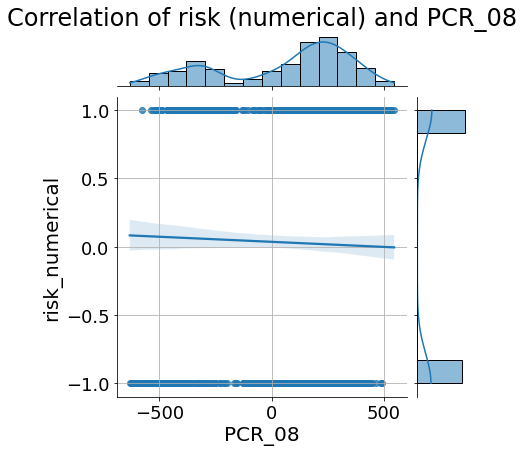

In [ ]:
feature = 'PCR_08'
#plt.grid(alpha=0.5)
x = train[feature]
y = train.risk_numerical
# Compute correlation
print("Correlation is: {:.3f}".format(train.corr().risk_numerical[feature]))
g = sns.jointplot(train[feature], train.risk_numerical, kind="reg")
_ = g.ax_joint.grid()
g.fig.suptitle(f'Correlation of risk (numerical) and {feature}',y=1.04)

Correlation is: 0.093


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.04, 'Correlation of risk (numerical) and PCR_10')

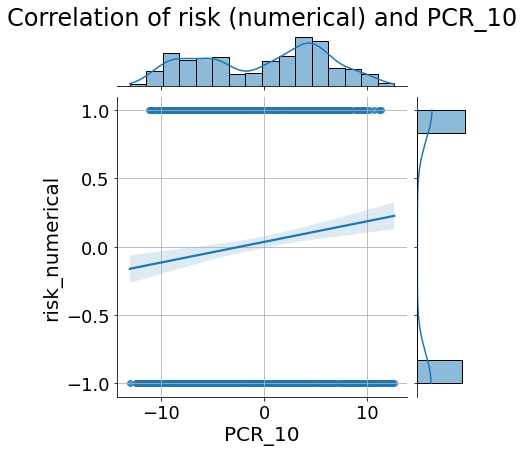

In [ ]:
feature = 'PCR_10'
# plt.grid(alpha=0.5)
x = train[feature]
y = train.risk_numerical
# Compute correlation
print("Correlation is: {:.3f}".format(train.corr().risk_numerical[feature]))
g = sns.jointplot(train[feature], train.risk_numerical, kind="reg")
_ = g.ax_joint.grid()
g.fig.suptitle(f'Correlation of risk (numerical) and {feature}',y=1.04)

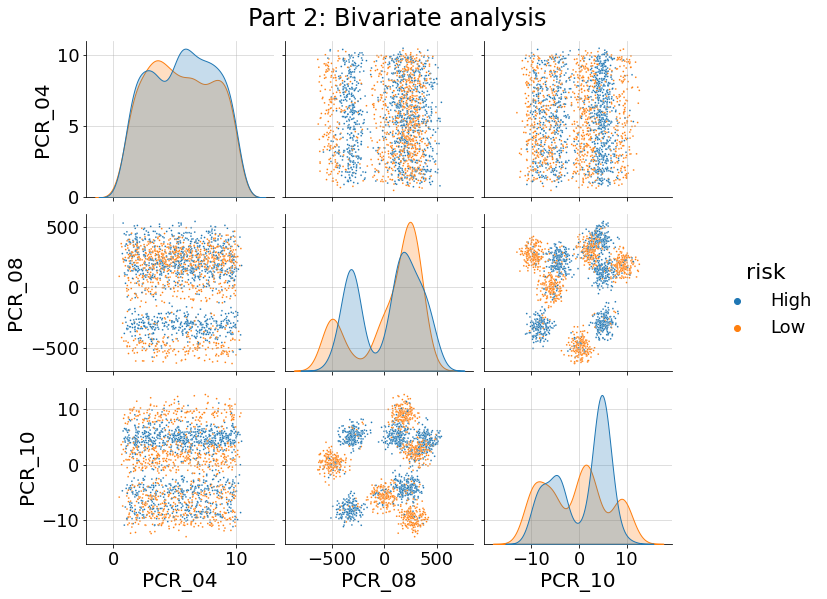

In [ ]:
# (Q7)
def draw_pairplot(features, hue, title):
  # The function draws pairplot of two features
  g=sns.pairplot(train, vars=features, hue=hue, plot_kws={"s": 3})
  g.fig.suptitle(title, y=1.04)
  for ax in np.ravel(g.axes):
    ax.grid(alpha=0.5)
  g.fig.set_size_inches(12,8)
draw_pairplot(['PCR_04', 'PCR_08', 'PCR_10'], hue="risk", title="Part 2: Bivariate analysis")

## k-NN implementation

In [ ]:
# kNN implementation
from sklearn.base import BaseEstimator, ClassifierMixin
from scipy.spatial.distance import cdist
class kNN(BaseEstimator, ClassifierMixin):

  def __init__(self, n_neighbors:int = 5):
    self.n_neighbors = n_neighbors

  def fit(self, X, y):
    self.X = X
    self.y = y
    return self

  def predict(self, X):
    # Note: You can use self.n_neighbors here
    # Compute the predicted labels (+1 or -1)
    distance = cdist(X, self.X)
    k = self.n_neighbors
    closest_k = np.argpartition(distance, k, axis=1)[:,:k]
    Y = np.ones([X.shape[0], 1]) * np.copy(self.y)
    tmp_res = Y[np.arange(Y.shape[0])[:,None], closest_k]
    predictions = np.sign(tmp_res.sum(axis=1))
    return predictions

In [ ]:
def visualize_clf(clf, X, Y, title, marker_size=150,
                  grid_length=300):
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["+", "*"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())
    #plot_step = 0.02

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip([-1, 1], palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()

In [ ]:
# partial is the data for the KNN
partial = train[['PCR_08', 'PCR_10']].copy().to_numpy()

def get_score_from_knn(k, data):
  h = kNN(k)
  h.fit(data, train.risk_numerical)
  return  h.score(data, train.risk_numerical)
print(get_score_from_knn(1,data=partial))
print(get_score_from_knn(9, data=partial))


1.0
0.834


The training accuracy of the model with k=1 is 1.0


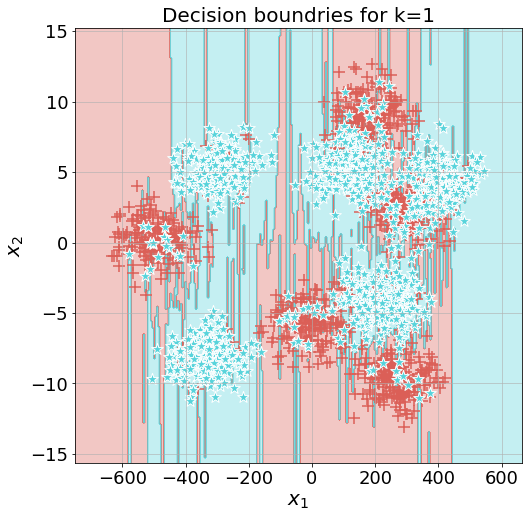

In [ ]:
k=1
h = kNN(1)
h.fit(partial, train.risk_numerical)
print(f'The training accuracy of the model with k={k} is {h.score(partial, train.risk_numerical)}')
X = train.loc[:, ['PCR_08', 'PCR_10']].to_numpy()
y = train.loc[:, ['risk_numerical']].to_numpy()
visualize_clf(h, X, y, "Decision boundries for k=1")

The training accuracy of the model with k=9 is 0.834


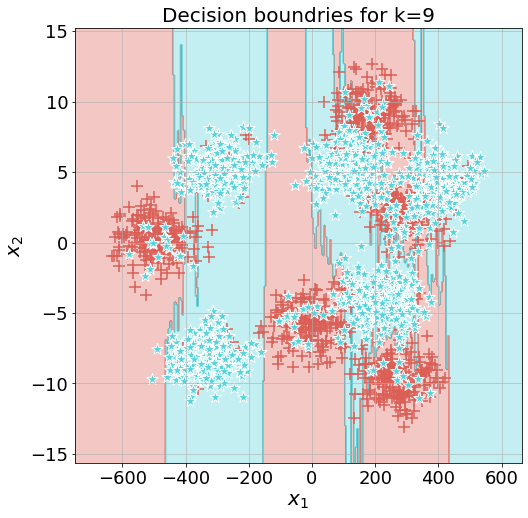

In [ ]:
k=9
h = kNN(9)
h.fit(partial, train.risk_numerical)
print(f'The training accuracy of the model with k={k} is {h.score(partial, train.risk_numerical)}')
X = train.loc[:, ['PCR_08', 'PCR_10']].to_numpy()
y = train.loc[:, ['risk_numerical']].to_numpy()
visualize_clf(h, X, y, "Decision boundries for k=9")

# Data Normalization


In [ ]:
partial.min(axis=0)

array([-631.3862108 ,  -13.05880456])

In [ ]:
# (Q9)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(partial)
print(get_score_from_knn(k=1, data=scaled_data))
print(get_score_from_knn(k=9, data=scaled_data))

1.0
0.8715


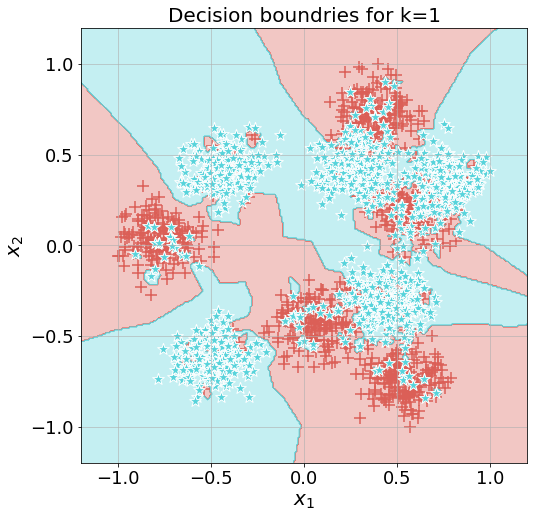

In [ ]:
h = kNN(1)
h.fit(scaled_data, train.risk_numerical)
y = train.loc[:, ['risk_numerical']].to_numpy()
visualize_clf(h, scaled_data, y, "Decision boundries for k=1")

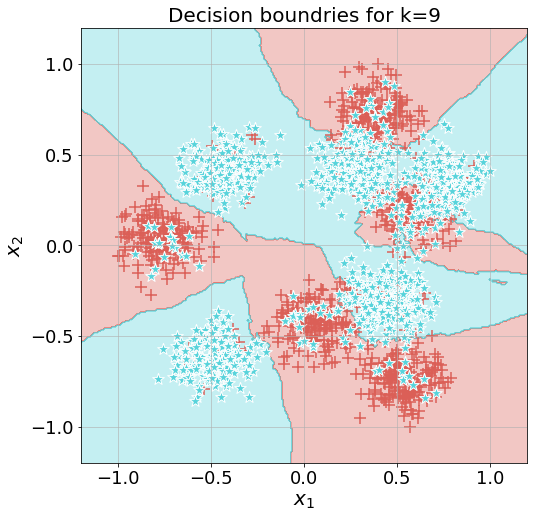

In [ ]:
h = kNN(9)
h.fit(scaled_data, train.risk_numerical)
y = train.loc[:, ['risk_numerical']].to_numpy()
visualize_clf(h, scaled_data, y, "Decision boundries for k=9")

# Part 3: Data Exploration


In [ ]:
# (Q11)
# Note that we perform the actuall change later in this notebook (In Q13)
pd.get_dummies(data=train, columns=["blood_type"])

patient_id   age  sex  weight  \
921         1726  33.0    F    55.9   
2438        7309  40.0    F    73.7   
2457        5704   8.0    F    41.9   
1124        3822  26.0    M   113.8   
1219          57  28.0    M    53.7   
...          ...   ...  ...     ...   
1393        4126   3.0    M    34.7   
2409        4683  24.0    F    48.1   
864         4412  36.0  NaN    77.7   
808         6090   3.0    M    23.8   
2284        6345  28.0    F    71.0   

                                                address  \
921                          USCGC Mclean\nFPO AA 61590   
2438        7888 Katherine Bridge\nSylviastad, SC 30447   
2457       44718 Michael Squares\nNew Heather, HI 51592   
1124  97186 Melanie Lodge Apt. 376\nLake Philipberg,...   
1219                         USS Faulkner\nFPO AP 36758   
...                                                 ...   
1393  0832 Conley Avenue Suite 092\nPort Bernardstad...   
2409  367 Matthew Harbor Apt. 835\nBillyburgh, IL 83131   
864   18001 Holmes Creek Apt. 253\nNorth Victoria, M...   
808       75734 Bryan Causeway\nNorth Stephen, MD 25076   
2284           634 Mark Tunnel\nGutierrezview, UT 01224   

                current_location  num_of_siblings  happiness_score  \
921    ('10.22677', '-67.33122')              0.0              7.0   
2438                         NaN              2.0              7.0   
2457    ('58.63667', '59.80222')              1.0              9.0   
1124                         NaN              2.0              8.0   
1219    ('17.30858', '97.01124')              2.0              8.0   
...                          ...              ...              ...   
1393   ('-2.90055', '-79.00453')              0.0              6.0   
2409   ('-8.99167', '125.21972')              1.0              7.0   
864    ('45.16024', '-93.08883')              1.0              7.0   
808   ('33.03699', '-117.29198')              1.0              8.0   
2284     ('41.15612', '1.10687')              3.0              6.0   

      household_income  conversations_per_day  sugar_levels  sport_activity  \
921             343.30                    5.0           NaN             1.0   
2438             32.40                    2.0          99.0             0.0   
2457            486.60                    5.0         108.0             0.0   
1124            384.30                    6.0         134.0             0.0   
1219            618.12                    0.0          84.0             0.0   
...                ...                    ...           ...             ...   
1393            613.30                    0.0         105.0             1.0   
2409            427.20                    4.0          90.0             3.0   
864                NaN                    3.0          98.0             2.0   
808             857.00                    3.0          99.0             NaN   
2284            361.80                    0.0          98.0             0.0   

               symptoms  pcr_date    PCR_01    PCR_02  PCR_03    PCR_04  \
921                 NaN  11-01-20 -0.407078  0.199847     2.0  6.329813   
2438       low_appetite  25-01-20  0.783992 -0.484507     3.0  8.902844   
2457                NaN  29-06-20 -0.299679       NaN     3.0  9.618255   
1124                NaN  12-04-20 -0.445683 -0.418327     3.0  4.356374   
1219                NaN  17-02-20 -1.004175  0.041484     5.0  6.844278   
...                 ...       ...       ...       ...     ...       ...   
1393        sore_throat  17-02-20 -1.074682 -0.504752     3.0  5.660199   
2409                NaN  16-08-20  0.948588       NaN     3.0  6.360762   
864         sore_throat  13-06-21 -0.269487  0.997967     1.0  9.073691   
808   sore_throat;fever  19-08-20 -0.458059 -0.831631     1.0  8.331655   
2284                NaN  05-07-20 -0.244723 -0.397685     1.0  6.810790   

          PCR_05      PCR_06     PCR_07      PCR_08     PCR_09     PCR_10  \
921   250.108621  147.442692        NaN  423.763542  -8.4313

In [ ]:
# (Q12)
for symptom in ["cough", "low_appetite", "sore_throat", "fever", "shortness_of_breath"]:
  train[symptom] = train.symptoms.str.contains(symptom).map({True:1, False:0, np.nan:np.nan})
train.head()

patient_id   age sex  weight blood_type  \
921         1726  33.0   F    55.9         O+   
2438        7309  40.0   F    73.7         B+   
2457        5704   8.0   F    41.9         B+   
1124        3822  26.0   M   113.8         O+   
1219          57  28.0   M    53.7         A+   

                                                address  \
921                          USCGC Mclean\nFPO AA 61590   
2438        7888 Katherine Bridge\nSylviastad, SC 30447   
2457       44718 Michael Squares\nNew Heather, HI 51592   
1124  97186 Melanie Lodge Apt. 376\nLake Philipberg,...   
1219                         USS Faulkner\nFPO AP 36758   

               current_location  num_of_siblings  happiness_score  \
921   ('10.22677', '-67.33122')              0.0              7.0   
2438                        NaN              2.0              7.0   
2457   ('58.63667', '59.80222')              1.0              9.0   
1124                        NaN              2.0              8.0   
1219   ('17.30858', '97.01124')              2.0              8.0   

      household_income  conversations_per_day  sugar_levels  sport_activity  \
921             343.30                    5.0           NaN             1.0   
2438             32.40                    2.0          99.0             0.0   
2457            486.60                    5.0         108.0             0.0   
1124            384.30                    6.0         134.0             0.0   
1219            618.12                    0.0          84.0             0.0   

          symptoms  pcr_date    PCR_01    PCR_02  PCR_03    PCR_04  \
921            NaN  11-01-20 -0.407078  0.199847     2.0  6.329813   
2438  low_appetite  25-01-20  0.783992 -0.484507     3.0  8.902844   
2457           NaN  29-06-20 -0.299679       NaN     3.0  9.618255   
1124           NaN  12-04-20 -0.445683 -0.418327     3.0  4.356374   
1219           NaN  17-02-20 -1.004175  0.041484     5.0  6.844278   

          PCR_05      PCR_06     PCR_07      PCR_08     PCR_09    PCR_10  \
921   250.108621  147.442692        NaN  423.763542  -8.431349  3.682026   
2438   10.267538  280.711775 -17.485533  141.848669 -22.091340  5.276248   
2457  286.775040  180.205426  -1.375180  169.511608 -15.573490  9.418958   
1124  253.868820  241.333952  -4.920634  462.771913  -0.342635  3.491480   
1219  232.976326  304.182053   0.446967  401.743685 -10.121844  2.724149   

      risk spread  covid  risk_numerical  cough  low_appetite  sore_throat  \
921   High    Low  False             1.0    NaN           NaN          NaN   
2438  High   High   True             1.0    0.0           1.0          0.0   
2457   Low   High   True            -1.0    NaN           NaN          NaN   
1124  High   High  False             1.0    NaN           NaN          NaN   
1219  High    Low   True             1.0    NaN           NaN          NaN   

      fever  shortness_of_breath  
921     NaN                  NaN  
2438    0.0                  0.0  
2457    NaN                  NaN  
1124    NaN                  NaN  
1219    NaN                  NaN

In [ ]:
# (Q13)
# additional data extraction
# current location
train[["x_coord", "y_coord"]] = train.current_location.str.split("'", expand=True)[[1,3]].astype(np.float64)
# address
train['state'] = train.address.apply(lambda x: np.nan if pd.isna(x) else x.split(" ")[-2]).astype("category")
# The first digit of the zipcode represents a certain group of U.S. states (which we called a region)
train['region'] = train.address.apply(lambda x: np.nan if pd.isna(x) else x.split(" ")[-1][0]).astype("float64") 
# pcr_date
train[['year', 'month']] = train.pcr_date.str.split("-", expand=True)[[2,1]].astype(np.float64)



In [ ]:
# Imputations of categorical features (that we wish to perform before OHE)
random_cols = ["sex", "blood_type"]

def random_sample_imputation(data, col):
  train.loc[train[col].isna(), col] = train[col].dropna().sample(train[col].isna().sum(), random_state=29).tolist()
  
for col in random_cols:
  random_sample_imputation(train, col)


In [ ]:
# convert to OHE (categorical)
train = pd.concat([train, pd.get_dummies(data=train[['sex','blood_type']])], axis=1) ### TODO: at the moment here we concat the OHE not replacing!
# 
train.head()

patient_id   age sex  weight blood_type  \
921         1726  33.0   F    55.9         O+   
2438        7309  40.0   F    73.7         B+   
2457        5704   8.0   F    41.9         B+   
1124        3822  26.0   M   113.8         O+   
1219          57  28.0   M    53.7         A+   

                                                address  \
921                          USCGC Mclean\nFPO AA 61590   
2438        7888 Katherine Bridge\nSylviastad, SC 30447   
2457       44718 Michael Squares\nNew Heather, HI 51592   
1124  97186 Melanie Lodge Apt. 376\nLake Philipberg,...   
1219                         USS Faulkner\nFPO AP 36758   

               current_location  num_of_siblings  happiness_score  \
921   ('10.22677', '-67.33122')              0.0              7.0   
2438                        NaN              2.0              7.0   
2457   ('58.63667', '59.80222')              1.0              9.0   
1124                        NaN              2.0              8.0   
1219   ('17.30858', '97.01124')              2.0              8.0   

      household_income  conversations_per_day  sugar_levels  sport_activity  \
921             343.30                    5.0           NaN             1.0   
2438             32.40                    2.0          99.0             0.0   
2457            486.60                    5.0         108.0             0.0   
1124            384.30                    6.0         134.0             0.0   
1219            618.12                    0.0          84.0             0.0   

          symptoms  pcr_date    PCR_01    PCR_02  PCR_03    PCR_04  \
921            NaN  11-01-20 -0.407078  0.199847     2.0  6.329813   
2438  low_appetite  25-01-20  0.783992 -0.484507     3.0  8.902844   
2457           NaN  29-06-20 -0.299679       NaN     3.0  9.618255   
1124           NaN  12-04-20 -0.445683 -0.418327     3.0  4.356374   
1219           NaN  17-02-20 -1.004175  0.041484     5.0  6.844278   

          PCR_05      PCR_06     PCR_07      PCR_08     PCR_09    PCR_10  \
921   250.108621  147.442692        NaN  423.763542  -8.431349  3.682026   
2438   10.267538  280.711775 -17.485533  141.848669 -22.091340  5.276248   
2457  286.775040  180.205426  -1.375180  169.511608 -15.573490  9.418958   
1124  253.868820  241.333952  -4.920634  462.771913  -0.342635  3.491480   
1219  232.976326  304.182053   0.446967  401.743685 -10.121844  2.724149   

      risk spread  covid  risk_numerical  cough  low_appetite  sore_throat  \
921   High    Low  False             1.0    NaN           NaN          NaN   
2438  High   High   True             1.0    0.0           1.0          0.0   
2457   Low   High   True            -1.0    NaN           NaN          NaN   
1124  High   High  False             1.0    NaN           NaN          NaN   
1219  High    Low   True             1.0    NaN           NaN          NaN   

      fever  shortness_of_breath   x_coord   y_coord state  region  year  \
921     NaN                  NaN  10.22677 -67.33122    AA     6.0  20.0   
2438    0.0                  0.0       NaN       NaN    SC     3.0  20.0   
2457    NaN                  NaN  58.63667  59.80222    HI     5.0  20.0   
1124    NaN                  NaN       NaN       NaN    TX     2.0  20.0   
1219    NaN                  NaN  17.30858  97.01124    AP     3.0  20.0   

      month  sex_F  sex_M  blood_type_A+  blood_type_A-  blood_type_AB+  \
921     1.0      1      0              0              0               0   
2438    1.0      1      0              0              0               0   
2457    6.0      1      0              0              0               0   
1124    4.0      0      1              0              0               0   
1219    2.0      0      1              1              0               0   

      blood_type_AB-  blood_type_B+  blood_type_B-  blood_type_O+  \
921                0              0              0              1   
2438               0              1              0              0   
2457

In [ ]:
train["blood_type_A+"].count()

2000

In [ ]:
train.columns

Index(['patient_id', 'age', 'sex', 'weight', 'blood_type', 'address',
       'current_location', 'num_of_siblings', 'happiness_score',
       'household_income', 'conversations_per_day', 'sugar_levels',
       'sport_activity', 'symptoms', 'pcr_date', 'PCR_01', 'PCR_02', 'PCR_03',
       'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10',
       'risk', 'spread', 'covid', 'risk_numerical', 'cough', 'low_appetite',
       'sore_throat', 'fever', 'shortness_of_breath', 'x_coord', 'y_coord',
       'state', 'region', 'year', 'month', 'sex_F', 'sex_M', 'blood_type_A+',
       'blood_type_A-', 'blood_type_AB+', 'blood_type_AB-', 'blood_type_B+',
       'blood_type_B-', 'blood_type_O+', 'blood_type_O-'],
      dtype='object')

In [ ]:
# (Q14)
COL_NAME = ['age', 'sex', 'weight', 'blood_type', 'num_of_siblings', 'happiness_score',
            'household_income', 'conversations_per_day', 'sugar_levels',
            'sport_activity', 'PCR_01', 'PCR_02', 'PCR_03',
            'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10',
            'cough', 'low_appetite', 'sore_throat', 'fever', 'shortness_of_breath',
            'x_coord', 'y_coord', 'state', 'year', 'month', 'region']
KDE_FEATURES = ['age', 'weight', 'num_of_siblings', 'happiness_score',
            'household_income', 'conversations_per_day', 'sugar_levels',
            'sport_activity', 'PCR_01', 'PCR_02', 'PCR_03',
            'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10',
            'x_coord', 'y_coord', 'year',  'month']
COLS = 2
ROWS = len(COL_NAME)

In [ ]:
#train["pcr_date"] = pd.to_datetime(train.pcr_date, dayfirst=True)

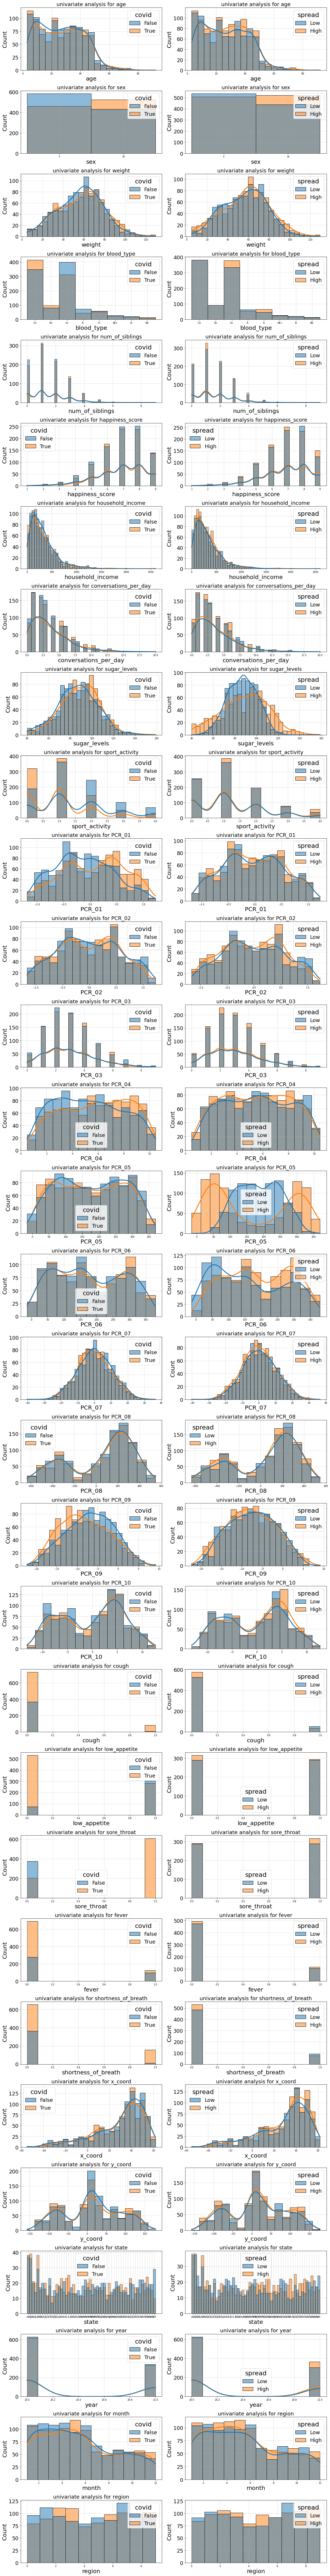

In [ ]:
# (Q14 - continue)
plt.figure(figsize=(8 * COLS, 4 * ROWS))
plt.rc('xtick', labelsize=8)

for row in range(ROWS):
  column = COL_NAME[row]
  ax = plt.subplot(ROWS,COLS, row * COLS + 1)
  ax.set_title("univariate analysis for " + column, fontsize=18)
  if column == "month":
    sns.histplot(data=train, x=column, hue="covid", line_kws={"linewidth": 3},
    kde=(column in KDE_FEATURES), bins=12)
  elif column == "region":
    sns.histplot(data=train, x=column, hue="covid", line_kws={"linewidth": 3},
    kde=(column in KDE_FEATURES), bins=10)
  else:
    sns.histplot(data=train, x=column, hue="covid", line_kws={"linewidth": 3},
    kde=(column in KDE_FEATURES))
  plt.grid(alpha=0.5)
  #plt.xticks(rotation=45)
  plt.subplot(ROWS,COLS, row * COLS + 2)
  if column == "month":
    ax2 = sns.histplot(data=train, x=column, hue="spread", line_kws={"linewidth": 3},
    kde=(column in KDE_FEATURES), bins=12)
  elif column == "region":
    sns.histplot(data=train, x=column, hue="spread", line_kws={"linewidth": 3},
    kde=(column in KDE_FEATURES), bins=10)
  else:
    ax2 = sns.histplot(data=train, x=column, hue="spread", line_kws={"linewidth": 3},
    kde=(column in KDE_FEATURES))
  ax2.set_title("univariate analysis for " + column, fontsize=18)
  plt.grid(alpha=0.5)
  #plt.xticks(rotation=45)
plt.tight_layout()


In [ ]:
# (Q15)
s = train.corr().spread_numerical.abs()
s.sort_values(kind="quicksort", ascending=False)
train["spread_numerical"] = train.spread.map({'High':1, 'Low':0, np.nan:np.nan})

spread_numerical         1.000000
PCR_06                   0.135714
PCR_05                   0.113222
cough                    0.062319
sugar_levels             0.057766
sex_M                    0.056204
sex_F                    0.056204
x_coord                  0.047676
shortness_of_breath      0.046821
year                     0.046031
PCR_10                   0.037096
blood_type_O-            0.032579
weight                   0.031790
PCR_07                   0.029934
blood_type_A-            0.027991
sport_activity           0.027804
PCR_09                   0.027635
blood_type_A+            0.026963
region                   0.025016
PCR_02                   0.024631
risk_numerical           0.024157
age                      0.022896
sore_throat              0.020437
blood_type_O+            0.020183
low_appetite             0.017238
PCR_04                   0.015864
blood_type_B-            0.014661
fever                    0.013405
patient_id               0.012266
blood_type_B+ 

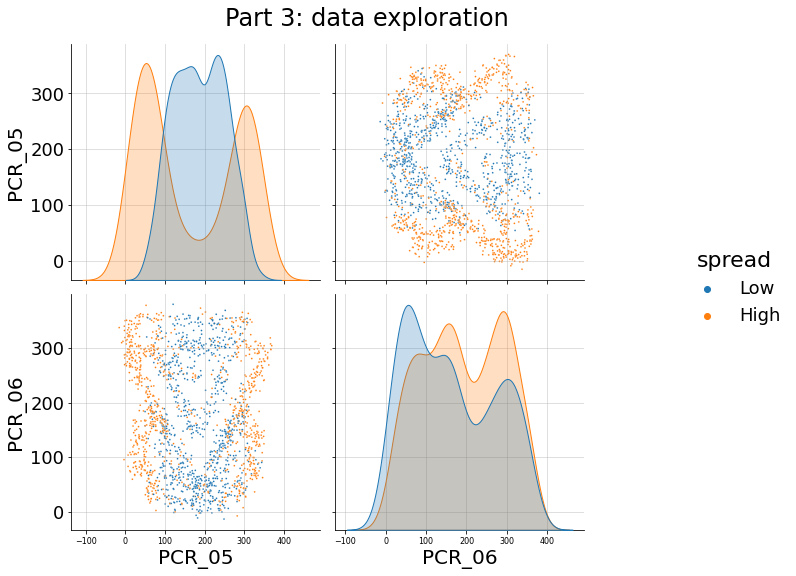

In [ ]:
# (Q16)
# Draw the 2 best features only
# TODO: Should draw marginal dist. as well.
draw_pairplot(["PCR_05", "PCR_06"], hue="spread", title="Part 3: data exploration")

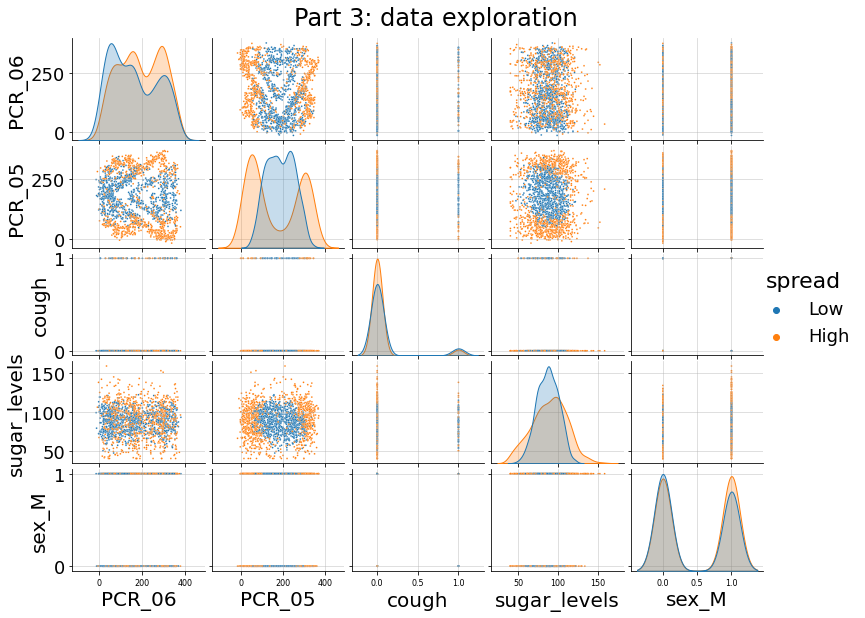

In [ ]:
# Get names of 5 features with best correlation to spread
top_features = list(s.sort_values(kind="quicksort", ascending=False)[1:6].index)
# draw pairplot for each two of these features
draw_pairplot(top_features, hue="spread", title="Part 3: data exploration")

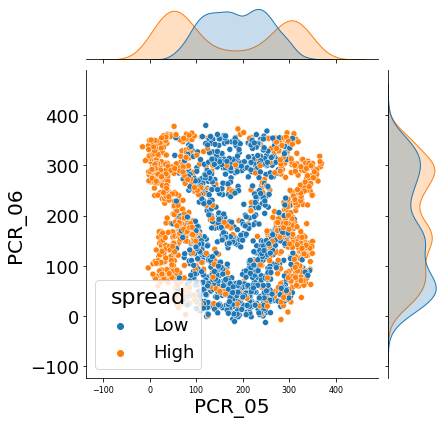

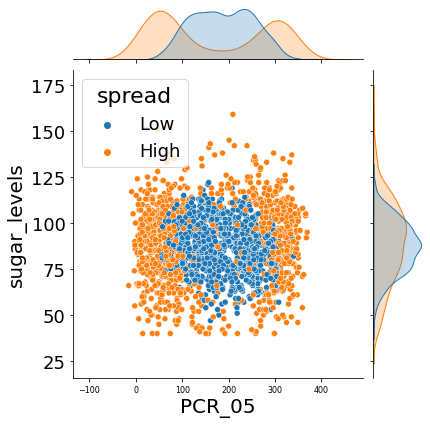

In [ ]:
sns.jointplot(data=train, x="PCR_05", y="PCR_06", hue="spread")

sns.jointplot(data=train, x="PCR_05", y="sugar_levels", hue="spread")

# Part 4: Preparing Data

## Missing data

In [ ]:
# (Q20)
# Here are some checks we made to decide which imputation to use.
# The imputation itself happens in Q21
train.happiness_score.count()

1905

In [ ]:
train.happiness_score.describe()

count    1905.000000
mean        6.956430
std         1.474465
min         1.000000
25%         6.000000
50%         7.000000
75%         8.000000
max         9.000000
Name: happiness_score, dtype: float64

In [ ]:
train.happiness_score.value_counts()

7.0    490
8.0    490
6.0    342
9.0    276
5.0    191
4.0     76
3.0     28
2.0     11
1.0      1
Name: happiness_score, dtype: int64

Text(0, 0.5, 'counts')

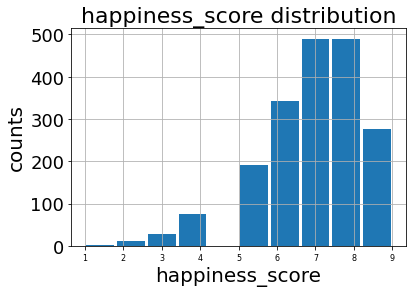

In [ ]:
train.happiness_score.hist(rwidth=0.9)
plt.title("happiness_score distribution")
plt.xlabel("happiness_score")
plt.ylabel("counts")

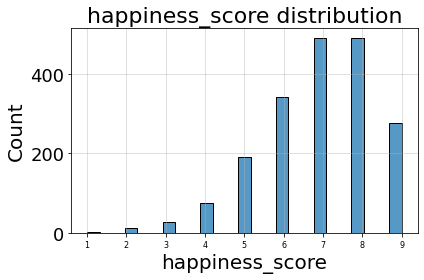

In [ ]:
column = "happiness_score"
plt.title("happiness_score distribution")
sns.histplot(data=train, x=column)
plt.grid(alpha=0.5)
plt.tight_layout()

In [ ]:
s = train.corr().happiness_score.abs()
s.sort_values(kind="quicksort", ascending=False)

happiness_score          1.000000
household_income         0.036603
blood_type_O-            0.033750
sport_activity           0.032748
risk_numerical           0.029839
fever                    0.028025
blood_type_O+            0.024916
blood_type_A-            0.024744
sore_throat              0.024182
cough                    0.023879
PCR_07                   0.023854
covid                    0.023259
shortness_of_breath      0.022489
sex_F                    0.022191
sex_M                    0.022191
weight                   0.022139
month                    0.021683
patient_id               0.021069
PCR_04                   0.020968
blood_type_A+            0.020502
x_coord                  0.020298
PCR_08                   0.018062
PCR_05                   0.017542
num_of_siblings          0.015543
region                   0.015073
PCR_02                   0.014805
age                      0.014010
sugar_levels             0.012039
blood_type_B-            0.011867
y_coord       

In [ ]:
train[train.happiness_score.isna()].describe()

patient_id        age      weight  num_of_siblings  happiness_score  \
count    95.000000  87.000000   93.000000        93.000000              0.0   
mean   3523.852632  27.068966   58.902151         1.623656              NaN   
std    2181.477822  14.765448   20.599641         1.276152              NaN   
min      12.000000   5.000000    5.000000         0.000000              NaN   
25%    1821.500000  15.000000   48.300000         1.000000              NaN   
50%    3464.000000  25.000000   61.000000         2.000000              NaN   
75%    5140.000000  38.500000   71.900000         2.000000              NaN   
max    7997.000000  64.000000  107.800000         6.000000              NaN   

       household_income  conversations_per_day  sugar_levels  sport_activity  \
count         89.000000              89.000000     91.000000       85.000000   
mean         255.493483               3.460674     90.043956        1.129412   
std          212.417594               2.808494     18.441446        1.203054   
min           13.800000               0.000000     45.000000        0.000000   
25%          107.900000               1.000000     79.000000        0.000000   
50%          195.200000               3.000000     89.000000        1.000000   
75%          322.800000               4.000000    101.000000        2.000000   
max         1014.080000              11.000000    142.000000        4.000000   

          PCR_01     PCR_02     PCR_03     PCR_04      PCR_05      PCR_06  \
count  89.000000  91.000000  90.000000  95.000000   89.000000   90.000000   
mean   -0.006109  -0.083708   2.900000   5.110288  163.628147  173.754414   
std     0.562569   0.549232   1.586814   2.633722  100.677128  108.273840   
min    -1.108680  -1.140292   0.000000   1.034244   -3.161119   -1.247750   
25%    -0.469843  -0.506210   2.000000   2.928670   69.032126   77.970758   
50%    -0.004173  -0.139298   3.000000   4.684735  155.770595  153.716721   
75%     0.386777   0.423074   4.000000   7.611026  257.063855  274.411842   
max     1.115371   0.957342   7.000000  10.460432  369.575055  361.601226   

          PCR_07      PCR_08     PCR_09     PCR_10  risk_numerical      cough  \
count  91.000000   95.000000  93.000000  95.000000       95.000000  59.000000   
mean    1.126656   43.532319  -7.067710   0.406398        0.010526   0.101695   
std    11.170226  310.095216   6.109510   6.353136        1.005249   0.304841   
min   -22.761216 -569.991132 -19.039111 -10.782908       -1.000000   0.000000   
25%    -6.159845 -300.884695 -12.168704  -5.184035       -1.000000   0.000000   
50%    -0.407522  180.740033  -6.836607   1.794293        1.000000   0.000000   
75%     9.875645  278.987478  -1.766822   5.260082        1.000000   0.000000   
max    28.724620  493.873552   5.558259  11.754723        1.000000   1.000000   

       low_appetite  sore_throat      fever  shortness_of_breath    x_coord  \
count     59.000000    59.000000  59.000000            59.000000  92.000000   
mean       0.508475     0.423729   0.237288             0.135593  30.064187   
std        0.504219     0.498390   0.429072             0.345295  24.659825   
min        0.000000     0.000000   0.000000             0.000000 -54.800000   
25%        0.000000     0.000000   0.000000             0.000000  15.204470   
50%        1.000000     0.000000   0.000000             0.000000  38.418945   
75%        1.000000     1.000000   0.000000             0.000000  50.067548   
max        1.000000     1.000000   1.000000             1.000000  60.024270   

          y_coord     region       year      month      sex_F      sex_M  \
count   92.000000  88.000000  92.000000  92.000000  95.000000  95.000000   
mean     7.965496   4.795455  20.369565   5.119565   0.547368   0.452632   
std     71.099122   2.644270   0.485332   3.389844   0.500392   0.500392   
min   -122.404330   0.000000  20.000000   1.000000   0.000000   0.000000   
25%    -55.478893   2.750000  20.000000   2.000000   0.0000

In [ ]:
train[~train.happiness_score.isna()].describe()

patient_id          age       weight  num_of_siblings  \
count  1905.000000  1809.000000  1790.000000      1799.000000   
mean   4030.119160    26.592593    56.910112         1.529739   
std    2309.105511    15.323660    22.063928         1.261247   
min       4.000000     3.000000     5.000000         0.000000   
25%    2039.000000    13.000000    40.600000         1.000000   
50%    4051.000000    27.000000    58.900000         1.000000   
75%    5985.000000    40.000000    72.300000         2.000000   
max    8000.000000    92.000000   129.300000         9.000000   

       happiness_score  household_income  conversations_per_day  sugar_levels  \
count      1905.000000       1813.000000             1823.00000   1807.000000   
mean          6.956430        316.860210                3.49808     87.965689   
std           1.474465        265.281025                2.88603     18.301612   
min           1.000000          1.000000                0.00000     40.000000   
25%           6.000000        127.600000                1.00000     76.000000   
50%           7.000000        254.400000                3.00000     88.000000   
75%           8.000000        426.700000                5.00000    100.000000   
max           9.000000       2593.560000               20.00000    159.000000   

       sport_activity       PCR_01       PCR_02       PCR_03       PCR_04  \
count     1814.000000  1811.000000  1817.000000  1825.000000  1905.000000   
mean         1.252481    -0.028840    -0.008040     2.966027     5.564639   
std          1.081960     0.564281     0.572063     1.765268     2.602824   
min          0.000000    -1.187518    -1.161531     0.000000     0.483812   
25%          0.000000    -0.451340    -0.443392     2.000000     3.350778   
50%          1.000000    -0.042252    -0.020180     3.000000     5.583113   
75%          2.000000     0.416090     0.440066     4.000000     7.768545   
max          4.000000     1.225437     1.231782     9.000000    10.378235   

            PCR_05       PCR_06       PCR_07       PCR_08       PCR_09  \
count  1807.000000  1815.000000  1810.000000  1905.000000  1822.000000   
mean    175.823379   177.496765     0.193473    46.304597    -7.596874   
std      99.140088   104.615481    10.218149   296.274861     5.868735   
min     -15.421751   -13.209828   -40.135782  -631.386211   -22.212634   
25%      88.742294    83.650661    -6.886766  -255.710097   -11.945213   
50%     173.926587   166.249455     0.156877   150.617150    -7.634712   
75%     262.466483   275.830896     7.047860   271.604620    -3.219365   
max     367.707018   379.893012    36.614924   545.623699     9.134072   

            PCR_10  risk_numerical        cough  low_appetite  sore_throat  \
count  1905.000000     1905.000000  1128.000000   1128.000000  1128.000000   
mean     -0.219327        0.033071     0.071809      0.490248     0.516844   
std       6.186674        0.999715     0.258285      0.500127     0.499938   
min     -13.058805       -1.000000     0.000000      0.000000     0.000000   
25%      -5.795142       -1.000000     0.000000      0.000000     0.000000   
50%       1.054862        1.000000     0.000000      0.000000     1.000000   
75%       4.786337        1.000000     0.000000      1.000000     1.000000   
max      12.658549        1.000000     1.000000      1.000000     1.000000   

             fever  shortness_of_breath      x_coord      y_coord  \
count  1128.000000          1128.000000  1812.000000  1812.000000   
mean      0.184397             0.142730    29.197819    13.511603   
std       0.387980             0.349953    22.861504    74.009191   
min       0.000000             0.000000   -54.800000  -156.474320   
25%       0.000000             0.000000    15.585520   -52.206390   
50%       0.000000             0.000000    36.203890    10.180030   
75%       0.000000             0.000000    45.478850    74.813047   
max       1.000000             1.000000    61.784910   178.004170   

      

In [ ]:
def plot_corr_matrix(df, title):
  corr_matrix = np.abs(df.corr()).round(decimals=3)

  mask = np.zeros_like(corr_matrix, dtype=bool)
  mask[np.triu_indices_from(mask)]= True

  f, ax = plt.subplots(figsize=(15, 20)) 
  heatmap = sns.heatmap(corr_matrix, 
                        mask = mask,
                        square = True,
                        linewidths = .5,
                        cmap = "OrRd",
                        cbar_kws = {'shrink': .6, "ticks" : [0, 0.5, 1]},
                        vmin = 0, 
                        vmax = 1,
                        annot = True,
                        annot_kws = {"size": 6})
  #add the column names as labels
  ax.set_title(title)
  ax.set_yticklabels(corr_matrix.columns, rotation = 0)
  ax.set_xticklabels(corr_matrix.columns)
  sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

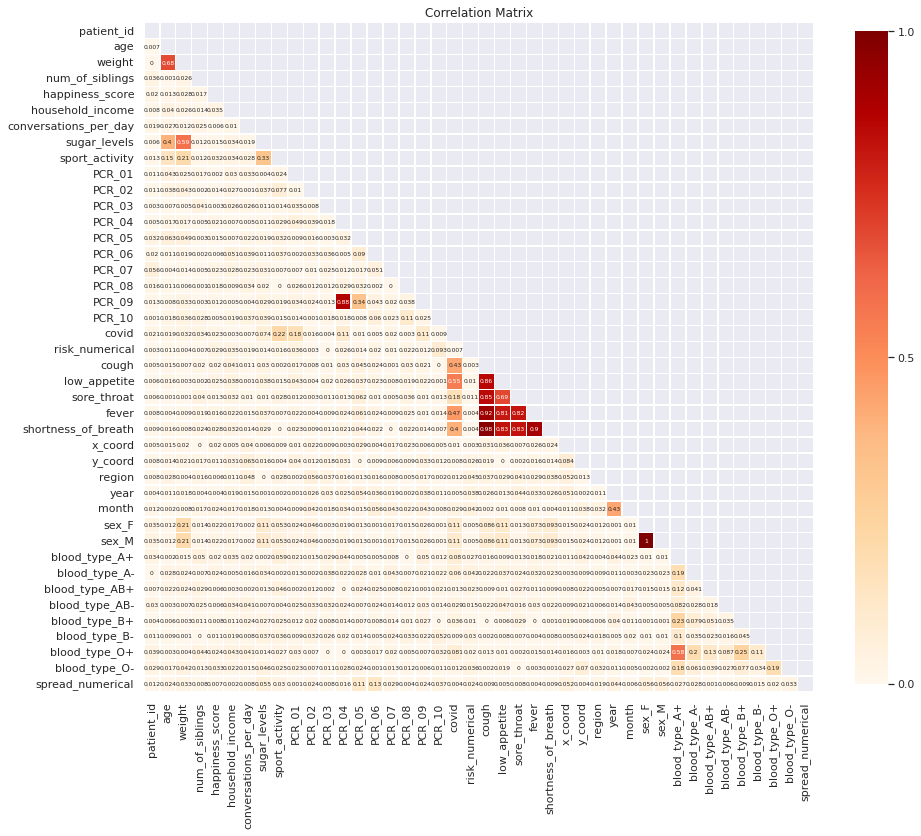

In [ ]:
sns.set(font_scale=1)
plot_corr_matrix(train, "Correlation Matrix")

Imputations

In [ ]:
# Imputations.
# Notice we already perform imputations for sex and blood_type (before OHE)

median_cols = ["happiness_score", "household_income", "conversations_per_day",
               "PCR_01", "PCR_02", "PCR_03", "PCR_06", "PCR_07"]
mean_cols = []
most_frequent_cols = []
random_cols = ["num_of_siblings", "state",  "year", "region"]

# Median imputation
train[median_cols] = train[median_cols].fillna(train[median_cols].median())
# Mean imputation
train[mean_cols] = train[mean_cols].fillna(train[mean_cols].mean())
# Most  frequent imputation (we don't actually use it)
# train[most_frequent_cols] = train[most_frequent_cols].fillna(train[most_frequent_cols].mode().loc[0])

def random_sample_imputation(data, col):
  train.loc[train[col].isna(), col] = train[col].dropna().sample(train[col].isna().sum(), random_state=29).tolist()
  
for col in random_cols:
  random_sample_imputation(train, col)

# Missing category imputation\ arbitrary value
# (notice this method was approved in piazza for imputation of symptoms)
symptoms = ['cough', 'low_appetite', 'sore_throat', 'fever', 'shortness_of_breath']
train[symptoms] = train[symptoms].fillna(2)

In [ ]:
train.weight.value_counts().describe()

count    772.000000
mean       2.439119
std        1.551594
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       12.000000
Name: weight, dtype: float64

Handling special imputations

In [ ]:
# Handling special imputations
# TODO: problem with this way of imputing age: there are a lot of different weights (perhaps should split to bins)

def median_imputation_according_to(col_to_impute, according_to_col):
  # Impute col_to_impute using the median  within according_to_col
  train[col_to_impute].fillna(train.groupby(according_to_col)[col_to_impute].transform('median'), inplace=True)

def median_imputation_according_to_bins(col_to_impute, according_to_col, bins_range):
  # Impute col_to_impute using the median within according_to_col, using bins
  train[col_to_impute].fillna(
      train.groupby(pd.cut(train[according_to_col], bins_range))[col_to_impute].transform("median"), inplace=True)

# Impute age according to median among patients with the same weight
median_imputation_according_to('age', 'weight')
# Since some values of age are still nan, fill them with random  sample imputation
random_sample_imputation(train, 'age')

# Impute weight according to age
median_imputation_according_to('weight', 'age')

# Impute sugar_levels using median in correspondance to weight
median_imputation_according_to_bins('sugar_levels', 'weight', np.arange(4, 135, 5))

# Impute sport_activity using median in correspondance to sugar_level
median_imputation_according_to_bins('sport_activity', 'sugar_levels', np.arange(39, 160, 10))

# Imputation of PCR09 - median according to bins of PCR04
median_imputation_according_to_bins('PCR_09', 'PCR_04', np.arange(0.4, 11, 0.2))
#train["PCR_09"].fillna(train.groupby(pd.cut(train["PCR_04"], np.arange(0.4, 10.5, 0.2))).PCR_09.transform("median"), inplace=True)
# Same for PCR05, with respect to PCR09
median_imputation_according_to_bins('PCR_05', 'PCR_09', np.arange(-23, 10, 0.5))
#train["PCR_05"].fillna(train.groupby(pd.cut(train["PCR_09"], np.arange(-23, 10, 0.5))).PCR_05.transform("median"), inplace=True)

def random_imputation_according_to(col_to_impute, according_to_col):
  # impute col_to_impute using random sample within according_to_col
  grouped = train.groupby(according_to_col)
  for name, group in grouped:
    train.loc[(train[according_to_col] == name) & (train[col_to_impute].isna()), col_to_impute] = \
      group[col_to_impute].dropna().sample(group[col_to_impute].isna().sum(), random_state=29).tolist()

random_imputation_according_to("month", "year")
random_imputation_according_to("x_coord", "region")
random_imputation_according_to("y_coord", "region")

In [ ]:
print(train.age.count())
print(train.weight.count())
print(train.PCR_05.count())
print(train.sugar_levels.count())
print(train.sport_activity.count())
print(train.PCR_09.count())
print(train.month.count())
print(train.x_coord.count())
print(train.y_coord.count())

2000
2000
2000
2000
2000
2000
2000
2000
2000


In [ ]:
train.loc[train.sport_activity.isna()][['sugar_levels', 'sport_activity']]

Empty DataFrame
Columns: [sugar_levels, sport_activity]
Index: []

In [ ]:
train.sugar_levels.describe()

count    2000.000000
mean       88.135000
std        18.007517
min        40.000000
25%        76.000000
50%        89.000000
75%       100.000000
max       159.000000
Name: sugar_levels, dtype: float64

In [ ]:
pd.cut(train["sugar_levels"], np.arange(39, 160, 5)).isna().any()

False

In [ ]:
train.PCR_04.describe()

count    2000.000000
mean        5.543058
std         2.605428
min         0.483812
25%         3.285569
50%         5.551100
75%         7.759463
max        10.460432
Name: PCR_04, dtype: float64

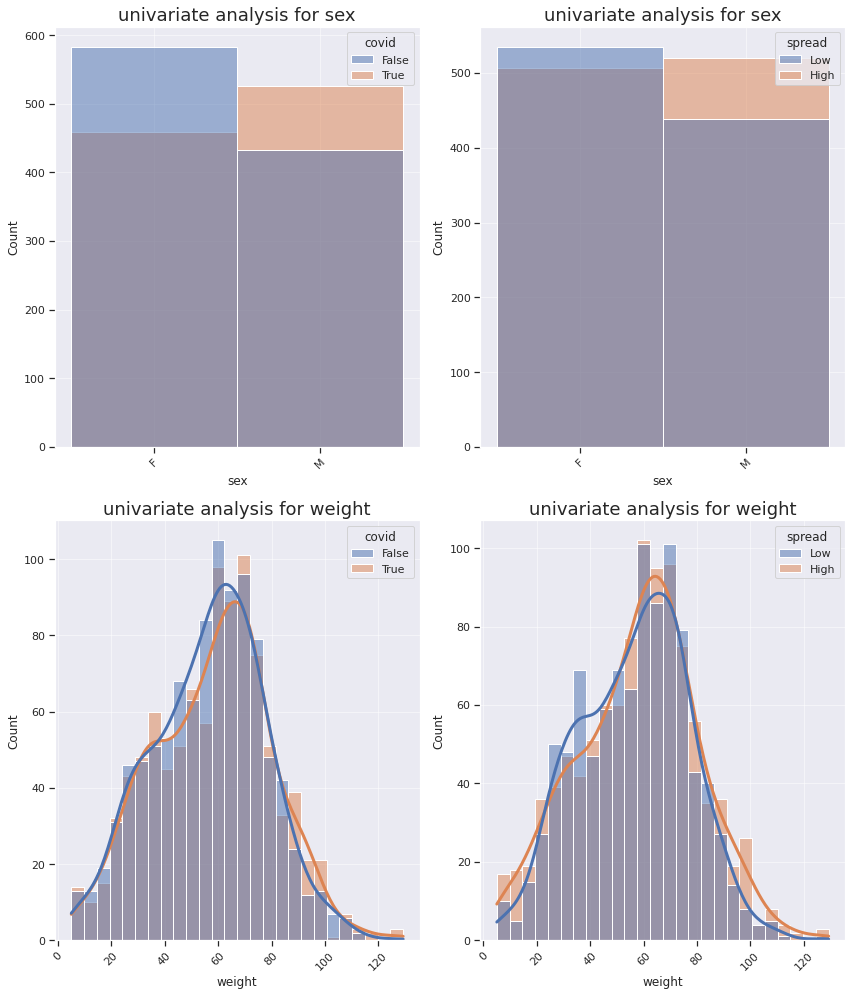

In [ ]:
# Show univariate analysis
COL_NAME = ['sex', 'weight']
KDE_FEATURES = ['weight']
COLS = 2
ROWS = len(COL_NAME)

plt.figure(figsize=(6 * COLS, 7 * ROWS))

for row in range(ROWS):
  column = COL_NAME[row]
  ax = plt.subplot(ROWS,COLS, row * COLS + 1)
  ax.set_title("univariate analysis for " + column, fontsize=18)
  sns.histplot(data=train, x=column, hue="covid", line_kws={"linewidth": 3},
    kde=(column in KDE_FEATURES))
  plt.grid(alpha=0.5)
  plt.xticks(rotation=45)
  plt.subplot(ROWS,COLS, row * COLS + 2)
  ax2 = sns.histplot(data=train, x=column, hue="spread", line_kws={"linewidth": 3},
  kde=(column in KDE_FEATURES))
  ax2.set_title("univariate analysis for " + column, fontsize=18)
  plt.grid(alpha=0.5)
  plt.xticks(rotation=45)
plt.tight_layout()


In [ ]:
train.corr().risk_numerical.abs().sort_values()

PCR_03                   0.000212
x_coord                  0.002946
patient_id               0.002986
PCR_02                   0.003185
cough                    0.003198
fever                    0.003798
weight                   0.003873
shortness_of_breath      0.003975
sex_M                    0.004662
sex_F                    0.004662
covid                    0.006524
num_of_siblings          0.006606
low_appetite             0.009770
PCR_07                   0.009778
blood_type_B+            0.010130
sore_throat              0.010591
age                      0.011445
PCR_09                   0.012156
sugar_levels             0.013717
PCR_05                   0.014219
blood_type_AB-           0.014849
sport_activity           0.015899
conversations_per_day    0.018570
PCR_06                   0.019544
blood_type_O+            0.019996
PCR_08                   0.022118
blood_type_AB+           0.023382
spread_numerical         0.024157
y_coord                  0.026016
PCR_04        

In [ ]:
train[["PCR_04", "PCR_09"]].describe(percentiles=np.arange(0, 1, 0.1))

PCR_04       PCR_09
count  2000.000000  2000.000000
mean      5.543058    -7.590397
std       2.605428     5.843010
min       0.483812   -22.212634
0%        0.483812   -22.212634
10%       1.937260   -15.440668
20%       2.903621   -12.992532
30%       3.725692   -11.111488
40%       4.683004    -9.356436
50%       5.551100    -7.573870
60%       6.389821    -5.991848
70%       7.323837    -4.016939
80%       8.221797    -2.228295
90%       9.134568     0.107927
max      10.460432     9.134072

In [ ]:
# Show percent of missing data
(2000 - train.count()) / 20

patient_id                0.00
age                       0.00
sex                       0.00
weight                    0.00
blood_type                0.00
address                   5.30
current_location          4.80
num_of_siblings           0.00
happiness_score           0.00
household_income          0.00
conversations_per_day     0.00
sugar_levels              0.00
sport_activity            0.00
symptoms                 40.65
pcr_date                  4.60
PCR_01                    0.00
PCR_02                    0.00
PCR_03                    0.00
PCR_04                    0.00
PCR_05                    0.00
PCR_06                    0.00
PCR_07                    0.00
PCR_08                    0.00
PCR_09                    0.00
PCR_10                    0.00
risk                      0.00
spread                    0.00
covid                     0.00
risk_numerical            0.00
cough                     0.00
low_appetite              0.00
sore_throat               0.00
fever   

In [ ]:
# Imputation type - list of imputations types we chose for each feature + reasons
'age', # median according to weight, fill leftovers with random (this should happen before weight impute)
'sex', # random sample
'weight', # median in age group (after age imputation)
'blood_type', # random sample (more than 5% missing)
'num_of_siblings', # random sample (more than 5% missing)
'happiness_score', # median sample (we already did)
'household_income', # median imputation (dist. is shifted gaussian)
'conversations_per_day', # median imputation (skewed dist.)
'sugar_levels', # median in correspondance to weight
'sport_activity', # median in correspondance to sugar_level
'cough', 'low_appetite', 'sore_throat', 'fever', 'shortness_of_breath', # TODO: deal later (question in piazza)
'year', # random sample
'month', # random within the year
'PCR_01', # median imputation, because: Gaussian dist (also not correlated to other things).
'PCR_02', # median imputation, because: Gaussian dist (also not correlated to other things).
'PCR_03', # median imputation, because: Gaussian dist (also not correlated to other things).
'PCR_05', # it's correlated to spread, not gaussian. Impute using PCR_09 (because they are correlated).
'PCR_06', # median, since it's correlated to spread (even though it's not gaussian). TODO: Make sure
'PCR_07', # median imputation, because: Gaussian dist (also not correlated to other things).
'PCR_09', # Since PCR_04 is full, we'll use median in the relevant bin
'x_coord', 'y_coord', # compare to region, by random from samples with the same region (impute after region)
'state' # random sample imputation
'region' # random sample imputation



'region'

## Data Normalization

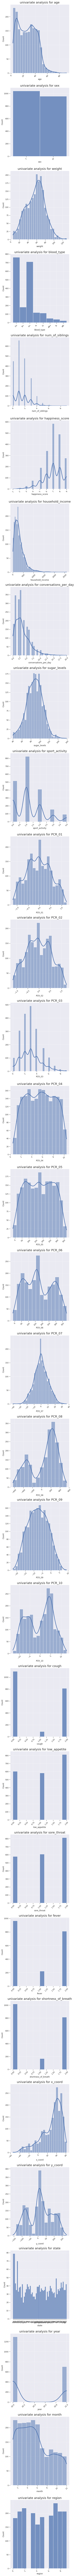

In [ ]:
# Plot hists of features (without hue)

COL_NAME = ['age', 'sex', 'weight', 'blood_type', 'num_of_siblings', 'happiness_score',
            'household_income', 'conversations_per_day', 'sugar_levels',
            'sport_activity', 'PCR_01', 'PCR_02', 'PCR_03',
            'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10',
            'cough', 'low_appetite', 'sore_throat', 'fever', 'shortness_of_breath',
            'x_coord', 'y_coord', 'state', 'year', 'month', 'region']
KDE_FEATURES = ['age', 'weight', 'num_of_siblings', 'happiness_score',
            'household_income', 'conversations_per_day', 'sugar_levels',
            'sport_activity', 'PCR_01', 'PCR_02', 'PCR_03',
            'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10',
            'x_coord', 'y_coord', 'year',  'month']
COLS = 2
ROWS = len(COL_NAME)
plt.figure(figsize=(6 * COLS, 7 * ROWS))

for row in range(ROWS):
  column = COL_NAME[row]
  ax = plt.subplot(ROWS,COLS, row * COLS + 1)
  ax.set_title("univariate analysis for " + column, fontsize=18)
  if column == "month":
    sns.histplot(data=train, x=column, line_kws={"linewidth": 3},
    kde=(column in KDE_FEATURES), bins=12)
  else:
    sns.histplot(data=train, x=column, line_kws={"linewidth": 3},
    kde=(column in KDE_FEATURES))
  plt.grid(alpha=0.5)
  plt.xticks(rotation=45)
plt.tight_layout()


In [ ]:
# Scaling the features
# Using minmax: scaler = MinMaxScaler(feature_range=(-1, 1))
'age' # Standard (because there are outliers)
'weight' # Standard (Q10, normal dist - therefore minmax  is  bad)
'num_of_siblings' # Standard (because there are outliers)
'happiness_score' # Standard (because there are outliers)
'household_income' # Standard (because there are outliers)
'conversations_per_day', # Standard (because there are outliers)
'sugar_levels', # Standard (Gaussian)
'sport_activity', # MinMaxScaling ?????
'PCR_01',# MinMaxScaling (it is already scaled)
'PCR_02', # MinMaxScaling (it is already scaled)
'PCR_03', # Standard (outliers)
'PCR_04', # MinMaxScaling (it's not a gaussian)
'PCR_05', # MinMaxScaling (it's not a gaussian)
'PCR_06', # MinMaxScaling (it's not a gaussian)
'PCR_07',# Standard (gaussian dist.)
'PCR_08', # MinMaxScaling (it's not a gaussian)
'PCR_09', # Standard (gaussian dist.)
'PCR_10', # MinMaxScaling (it's not a gaussian)
'x_coord', # Standard (there are outliers)
'y_coord', # MinMaxScaling (it's not a gaussian)
'state',# TODO: Later we'll OHE (or ignore)
'region', # MinMaxScaling
'year', # MinMax (there are two categories)
'month', # MinMax 


# From here: everything is already normalized,  we can  use MinMax (it wont do anything)
'sex_F', 'sex_M',
'cough', 'low_appetite',
'sore_throat', 'fever', 'shortness_of_breath',
'blood_type_A+',
'blood_type_A-', 'blood_type_AB+', 'blood_type_AB-', 'blood_type_B+',
'blood_type_B-', 'blood_type_O+', 'blood_type_O-'

('blood_type_B-', 'blood_type_O+', 'blood_type_O-')

In [ ]:
min_max_features = ['sugar_levels', 'sport_activity', 'PCR_01', 'PCR_02',
                    'PCR_04', 'PCR_05', 'PCR_06', 'PCR_08', 'PCR_10', 'y_coord',
                    'year', 'month', 'sex_F', 'sex_M', 'cough', 'low_appetite',
                    'sore_throat', 'fever', 'shortness_of_breath', 
                    'blood_type_A+', 'blood_type_A-', 'blood_type_AB+',
                    'blood_type_AB-', 'blood_type_B+', 'blood_type_B-',
                    'blood_type_O+', 'blood_type_O-', 'region']
standard_features = ['age', 'weight', 'num_of_siblings',  'happiness_score',
                     'household_income', 'conversations_per_day', 'PCR_03',
                     'PCR_07', 'PCR_09', 'x_coord', ]

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
train[min_max_features] = min_max_scaler.fit_transform(train[min_max_features])

# Notice we should impute before this (otherwise it won't work)
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
train[standard_features] = standard_scaler.fit_transform(train[standard_features])

train

patient_id       age sex    weight blood_type  \
921         1726  0.428478   F -0.054743         O+   
2438        7309  0.889951   F  0.767031         B+   
2457        5704 -1.219641   F -0.701081         B+   
1124        3822 -0.032995   M  2.618329         O+   
1219          57  0.098854   M -0.156310         A+   
...          ...       ...  ..       ...        ...   
1393        4126 -1.549265   M -1.033484         B+   
2409        4683 -0.164845   F -0.414845         O+   
864         4412  0.626252   F  0.951699         A+   
808         6090 -1.549265   M -1.536704         O+   
2284        6345  0.098854   F  0.642380         O+   

                                                address  \
921                          USCGC Mclean\nFPO AA 61590   
2438        7888 Katherine Bridge\nSylviastad, SC 30447   
2457       44718 Michael Squares\nNew Heather, HI 51592   
1124  97186 Melanie Lodge Apt. 376\nLake Philipberg,...   
1219                         USS Faulkner\nFPO AP 36758   
...                                                 ...   
1393  0832 Conley Avenue Suite 092\nPort Bernardstad...   
2409  367 Matthew Harbor Apt. 835\nBillyburgh, IL 83131   
864   18001 Holmes Creek Apt. 253\nNorth Victoria, M...   
808       75734 Bryan Causeway\nNorth Stephen, MD 25076   
2284           634 Mark Tunnel\nGutierrezview, UT 01224   

                current_location  num_of_siblings  happiness_score  \
921    ('10.22677', '-67.33122')        -1.206806         0.028846   
2438                         NaN         0.366092         0.028846   
2457    ('58.63667', '59.80222')        -0.420357         1.419017   
1124                         NaN         0.366092         0.723931   
1219    ('17.30858', '97.01124')         0.366092         0.723931   
...                          ...              ...              ...   
1393   ('-2.90055', '-79.00453')        -1.206806        -0.666239   
2409   ('-8.99167', '125.21972')        -0.420357         0.028846   
864    ('45.16024', '-93.08883')        -0.420357         0.028846   
808   ('33.03699', '-117.29198')        -0.420357         0.723931   
2284     ('41.15612', '1.10687')         1.152541        -0.666239   

      household_income  conversations_per_day  sugar_levels  sport_activity  \
921           0.125903               0.541197     -0.210084            -0.5   
2438         -1.083495              -0.523104     -0.008403            -1.0   
2457          0.683339               0.541197      0.142857            -1.0   
1124          0.285393               0.895965      0.579832            -1.0   
1219          1.194950              -1.232639     -0.260504            -1.0   
...                ...                    ...           ...             ...   
1393          1.176200              -1.232639      0.092437            -0.5   
2409          0.452273               0.186430     -0.159664             0.5   
864          -0.230615              -0.168337     -0.025210             0.0   
808           2.124191              -0.168337     -0.008403            -0.5   
2284          0.197868              -1.232639     -0.025210            -1.0   

               symptoms  pcr_date    PCR_01    PCR_02    PCR_03    PCR_04  \
921                 NaN  11-01-20 -0.353125  0.137652 -0.561151  0.171940   
2438       low_appetite  25-01-20  0.634104 -0.434237  0.020654  0.687752   
2457                NaN  29-06-20 -0.264106 -0.053331  0.020654  0.831170   
1124                NaN  12-04-20 -0.385123 -0.378933  0.020654 -0.223673   
1219                NaN  17-02-20 -0.848034  0.005314  1.184263  0.275074   
...                 ...       ...       ...       ...       ...       ...   
1393        sore_throat  17-02-20 -0.906475 -0.451155  0.020654  0.037704   
2409                NaN  16-08-20  0.770531 -0.053331  0.020654  0.178144   
864         sore_throat  13-06-21 -0.239082  0.804610 -1.142955  0.722002   
808   sore_throat;fever  19-08-20 -0.395381 -0.724315 -1.142955  0.573247   

# Part 5:  Feature Selection

## Manual Feature Selection

In [ ]:
tmp_df = train[[col for col in train.columns if "PCR" in col]].copy()
tmp_df.corr()

PCR_01    PCR_02    PCR_03    PCR_04    PCR_05    PCR_06    PCR_07  \
PCR_01  1.000000  0.010104  0.035419 -0.048738  0.008973 -0.001837 -0.007223   
PCR_02  0.010104  1.000000 -0.007967 -0.039193 -0.015704 -0.033437  0.009686   
PCR_03  0.035419 -0.007967  1.000000 -0.018470 -0.003425  0.035928 -0.024705   
PCR_04 -0.048738 -0.039193 -0.018470  1.000000 -0.031505  0.005387  0.012429   
PCR_05  0.008973 -0.015704 -0.003425 -0.031505  1.000000 -0.089839 -0.016784   
PCR_06 -0.001837 -0.033437  0.035928  0.005387 -0.089839  1.000000  0.050683   
PCR_07 -0.007223  0.009686 -0.024705  0.012429 -0.016784  0.050683  1.000000   
PCR_08  0.026089 -0.012489  0.011938 -0.028721  0.032168  0.001980  0.000147   
PCR_09  0.034404  0.024316  0.012789 -0.876695  0.337787 -0.042607 -0.020026   
PCR_10 -0.013686  0.000513 -0.017562  0.017665  0.008047  0.059920 -0.023223   

          PCR_08    PCR_09    PCR_10  
PCR_01  0.026089  0.034404 -0.013686  
PCR_02 -0.012489  0.024316  0.000513  
PCR_03  0.011938  0.012789 -0.017562  
PCR_04 -0.028721 -0.876695  0.017665  
PCR_05  0.032168  0.337787  0.008047  
PCR_06  0.001980 -0.042607  0.059920  
PCR_07  0.000147 -0.020026 -0.023223  
PCR_08  1.000000  0.037962  0.111316  
PCR_09  0.037962  1.000000 -0.025401  
PCR_10  0.111316 -0.025401  1.000000

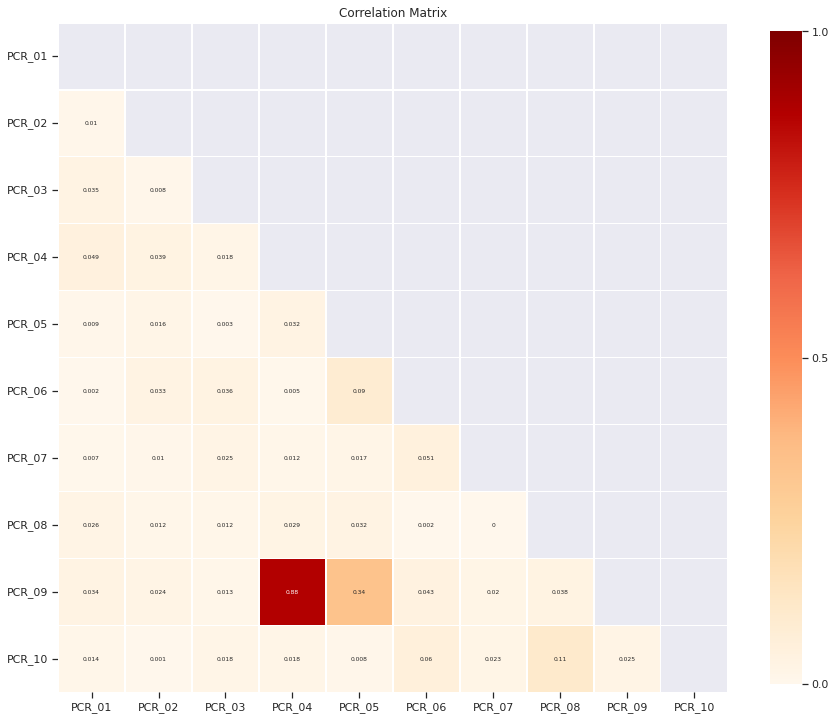

In [ ]:
plot_corr_matrix(tmp_df, "Correlation Matrix")

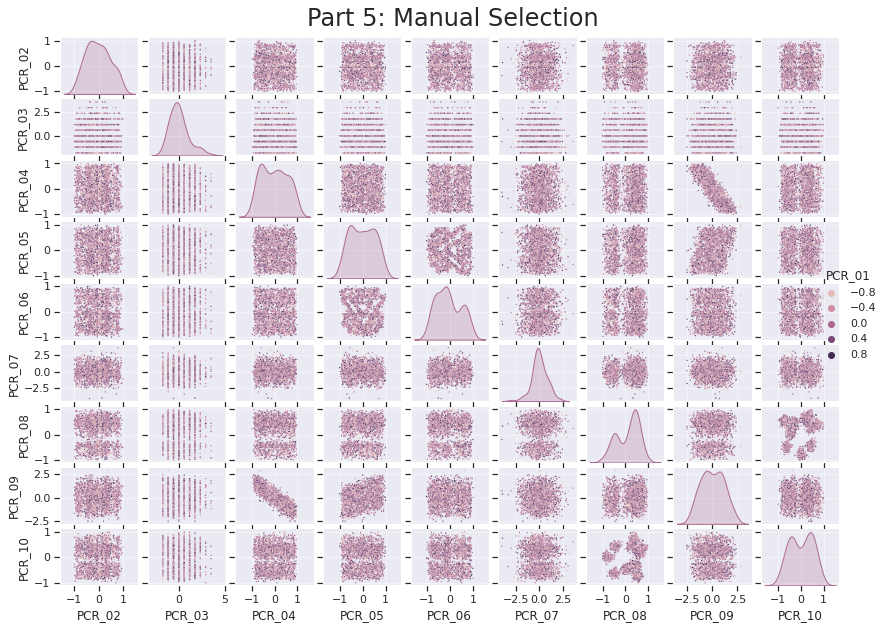

In [ ]:
g=sns.pairplot(tmp_df, hue="PCR_01", plot_kws={"s": 2})
g.fig.suptitle("Part 5: Manual Selection", y=1.04)
for ax in np.ravel(g.axes):
  ax.grid(alpha=0.5)
g.fig.set_size_inches(12,8)


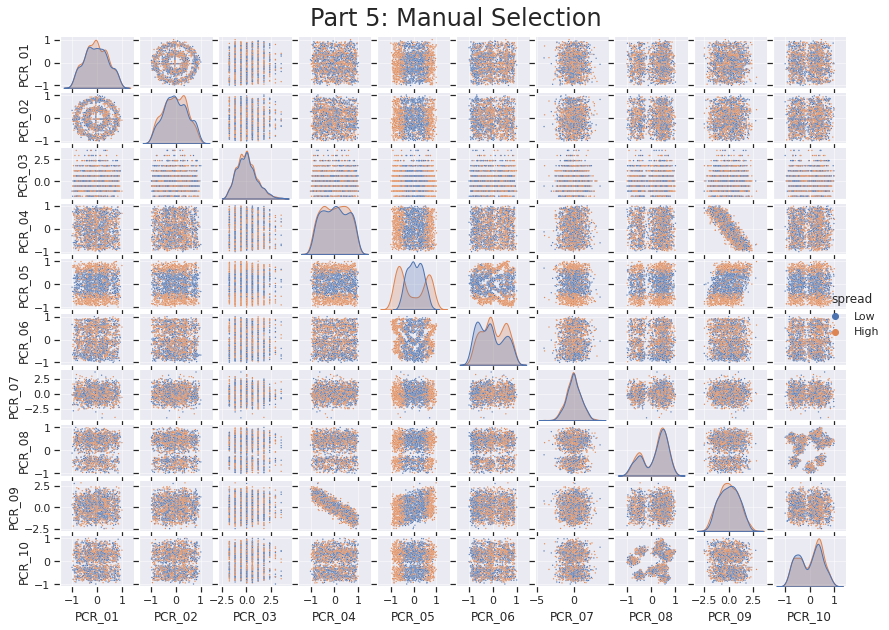

In [ ]:
g=sns.pairplot(train, vars=[col for col in train.columns if "PCR" in col], hue="spread", plot_kws={"s": 2})
g.fig.suptitle("Part 5: Manual Selection", y=1.04)
for ax in np.ravel(g.axes):
  ax.grid(alpha=0.5)
g.fig.set_size_inches(12,8)


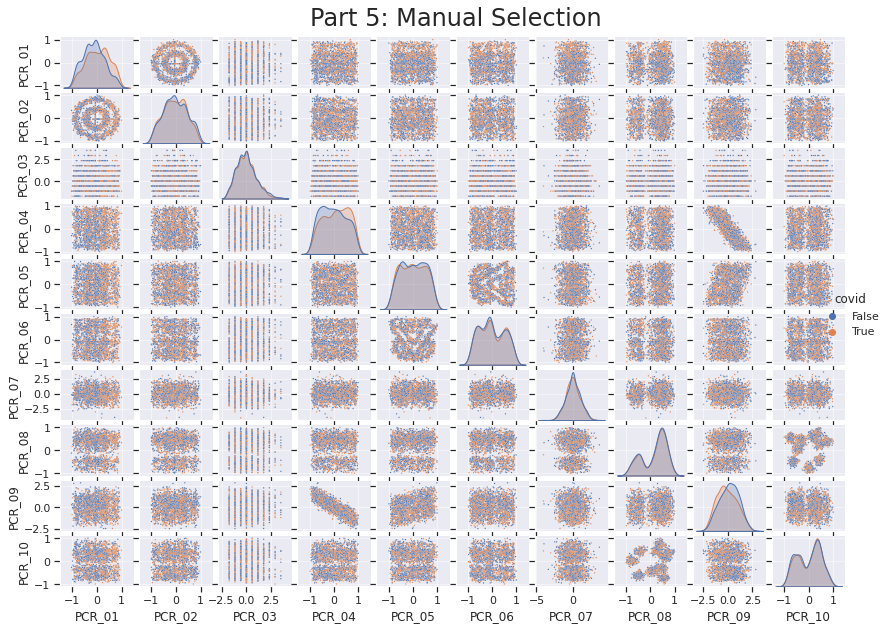

In [ ]:
g=sns.pairplot(train, vars=[col for col in train.columns if "PCR" in col], hue="covid", plot_kws={"s": 2})
g.fig.suptitle("Part 5: Manual Selection", y=1.04)
for ax in np.ravel(g.axes):
  ax.grid(alpha=0.5)
g.fig.set_size_inches(12,8)


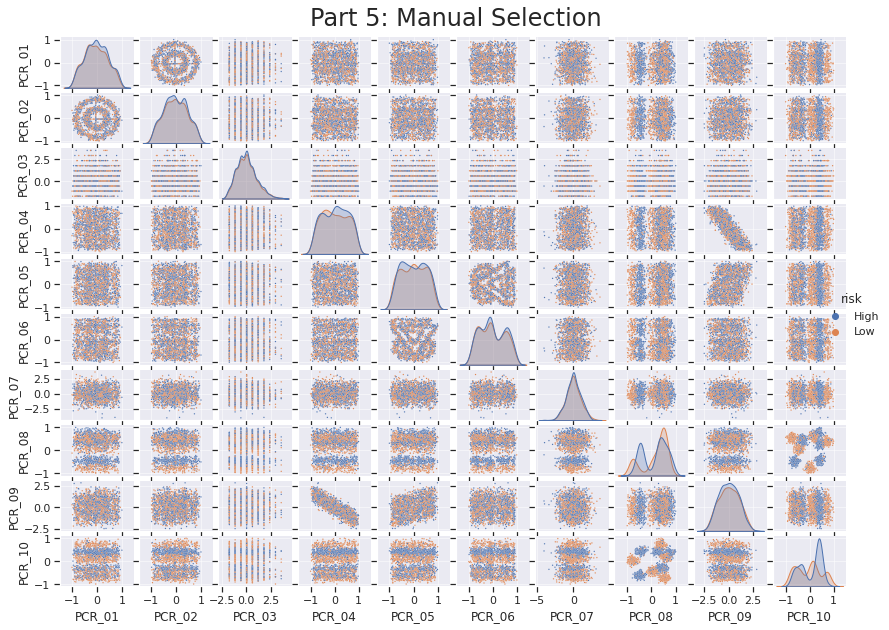

In [ ]:
g=sns.pairplot(train, vars=[col for col in train.columns if "PCR" in col], hue="risk", plot_kws={"s": 2})
g.fig.suptitle("Part 5: Manual Selection", y=1.04)
for ax in np.ravel(g.axes):
  ax.grid(alpha=0.5)
g.fig.set_size_inches(12,8)


In [ ]:
def plot3d(df, colX, colY, colZ, hue=None):
  %matplotlib inline

  fig = plt.figure(figsize=(20, 5))
  axes = [fig.add_subplot(1, 4, 1, projection='3d'),
          fig.add_subplot(1, 4, 2, projection='3d'),
          fig.add_subplot(1, 4, 3, projection='3d'),
          fig.add_subplot(1, 4, 4, projection='3d')]

  palette = sns.color_palette("hls", 2)

  for i,ax in enumerate(axes):
    if hue is None:
      ax.scatter3D(df[colX], df[colY], df[colZ], color=palette[0], s=1)
    else:
      idx = df[hue] == True
      df1 = df[idx]
      df2 = df[~idx]

      ax.scatter3D(df1[colX], df1[colY], df1[colZ], color=palette[0], s=1)
      ax.scatter3D(df2[colX], df2[colY], df2[colZ], color=palette[1], s=1)

    ax.set_xlabel(colX)
    ax.set_ylabel(colY)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    
    ax.view_init(elev=5., azim=45*i)
  
  axes[0].set_zlabel("\n" + colZ, linespacing=2.2)

  plt.tight_layout()
  plt.show()

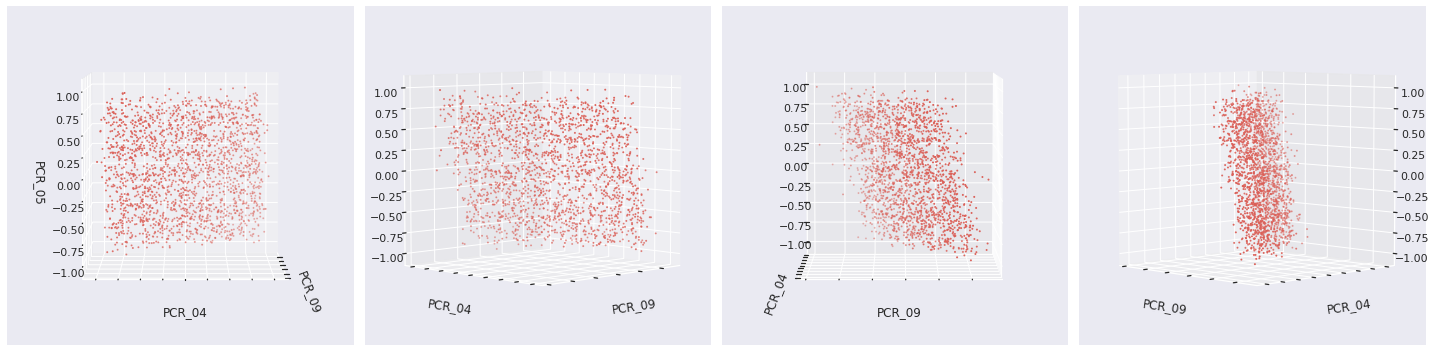

In [ ]:
plot3d(tmp_df, 'PCR_09', 'PCR_04', 'PCR_05')

## Automatic Feature Selection

In [ ]:
train.columns

Index(['patient_id', 'age', 'sex', 'weight', 'blood_type', 'address',
       'current_location', 'num_of_siblings', 'happiness_score',
       'household_income', 'conversations_per_day', 'sugar_levels',
       'sport_activity', 'symptoms', 'pcr_date', 'PCR_01', 'PCR_02', 'PCR_03',
       'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10',
       'risk', 'spread', 'covid', 'risk_numerical', 'cough', 'low_appetite',
       'sore_throat', 'fever', 'shortness_of_breath', 'x_coord', 'y_coord',
       'state', 'region', 'year', 'month', 'sex_F', 'sex_M', 'blood_type_A+',
       'blood_type_A-', 'blood_type_AB+', 'blood_type_AB-', 'blood_type_B+',
       'blood_type_B-', 'blood_type_O+', 'blood_type_O-', 'spread_numerical'],
      dtype='object')

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
COL_NAME = ['age', 'sex_F', 'sex_M', 'weight', 'blood_type_A+', 'blood_type_A-',
            'blood_type_AB+', 'blood_type_AB-', 'blood_type_B+',
            'blood_type_O+', 'blood_type_O-',
            'num_of_siblings', 'happiness_score',
            'household_income', 'conversations_per_day', 'sugar_levels',
            'sport_activity', 'PCR_01', 'PCR_02', 'PCR_03',
            'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10',
            'cough', 'low_appetite', 'sore_throat', 'fever', 'shortness_of_breath',
            'x_coord', 'y_coord', 'year', 'month', 'region']
X = train[COL_NAME]
y = train["spread"]
knn = KNeighborsClassifier(n_neighbors=5)
sfs = SequentialFeatureSelector(knn, n_features_to_select=2)
sfs.fit(X, y)
indices = sfs.get_support(indices=True)
#sfs.transform(X)
print("The selected features are: ")
print(COL_NAME[indices[0]], COL_NAME[indices[1]])

The selected features are: 
sugar_levels PCR_05


# How to download from Colab?

In [ ]:
from google.colab import files
outputPath = "saved_file.csv"
dataset.to_csv(outputPath)
files.download(outputPath) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>